In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
import datetime

In [2]:
cancer = load_breast_cancer()

In [3]:
# 数据集
cancer.data.shape

(569, 30)

In [4]:
# 标签值
set(cancer.target)

{0, 1}

In [5]:
X = cancer.data
y = cancer.target
Xtrains, Xtests, Ytrains, Ytests = train_test_split(X, y
                                                   , test_size = 0.3
                                                   , random_state = 10
                                                  )

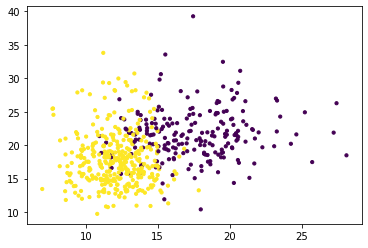

In [6]:
# 试着用两个维度进行可视化
plt.scatter(X[:, 0], X[:, 1],c=y, s=10)
plt.show()

In [12]:
# 使用的不同的核函数进行分类
# Kernels = ["linear", "poly", "rbf", "sigmoid"]
Kernels = ["linear", "rbf", "sigmoid"]

for kernel in Kernels:
    # 计时
    t0 = time()
    
    clf = SVC(kernel=kernel
              , gamma="auto"
              , cache_size=5000
             ).fit(Xtrains, Ytrains)
    
    print("The kerbel:%s, score is :%.2f" % (kernel, clf.score(Xtests, Ytests)))
    print(datetime.datetime.fromtimestamp(time()- t0).strftime("%M:%S:%f"))

The kerbel:linear, score is :0.96
30:02:312409
The kerbel:rbf, score is :0.65
30:00:014727
The kerbel:sigmoid, score is :0.65
30:00:006878


In [13]:
# 使用的不同的核函数进行分类
Kernels = ["linear", "poly", "rbf", "sigmoid"]
# Kernels = ["linear", "rbf", "sigmoid"]

for kernel in Kernels:
    # 计时
    t0 = time()
    
    clf = SVC(kernel=kernel
              , gamma="auto"
              , degree = 1
              , cache_size=5000
             ).fit(Xtrains, Ytrains)
    
    print("The kerbel:%s, score is :%.2f" % (kernel, clf.score(Xtests, Ytests)))
    print(datetime.datetime.fromtimestamp(time()- t0).strftime("%M:%S:%f"))

The kerbel:linear, score is :0.96
30:02:516431
The kerbel:poly, score is :0.95
30:00:018272
The kerbel:rbf, score is :0.65
30:00:014944
The kerbel:sigmoid, score is :0.65
30:00:006960


#### 量纲问题

In [15]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# 数据的量纲不统一, 出现了数据的偏态分布
df.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [23]:
# 数据预处理
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X)
df.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.356034e-17,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-7.960826e-17,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-3.824318e-17,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-2.341419e-18,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,-4.526744e-17,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,1.209733e-17,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-5.463312e-18,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,5.931596e-17,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,1.580458e-16,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-7.999850e-18,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [28]:
# 使用的不同的核函数进行分类(数据的量纲进行统一)
Kernels = ["linear", "poly", "rbf", "sigmoid"]
# Kernels = ["linear", "rbf", "sigmoid"]
Xtrains, Xtests, Ytrains, Ytests = train_test_split(X, y
                                                   , test_size = 0.3
                                                   , random_state = 10
                                                  )
for kernel in Kernels:
    # 计时
    t0 = time()
    
    clf = SVC(kernel=kernel
              , gamma="auto"
              , degree = 1
              , cache_size=5000
             ).fit(Xtrains, Ytrains)
    
    print("The kerbel:%s, score is :%.2f" % (kernel, clf.score(Xtests, Ytests)))
    print(datetime.datetime.fromtimestamp(time()- t0).strftime("%M:%S:%f"))

The kerbel:linear, score is :0.95
30:00:005269
The kerbel:poly, score is :0.98
30:00:004107
The kerbel:rbf, score is :0.98
30:00:020221
The kerbel:sigmoid, score is :0.96
30:00:013201


**结论:**
1. 线性核，尤其是多项式核函数在高次项时计算非常缓慢
2. rbf和多项式核函数都不擅长处理量纲不统一的数据集

### 探究核函数的参数gamma, degree, coef0

#### "rbf"核参数调整

0.9883040935672515 0.004291934260128779


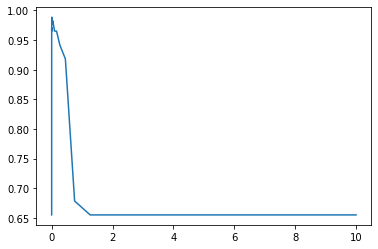

In [47]:
score = []

gamma_range = np.logspace(-10, 1, 50)

for i in gamma_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(Xtrains, Ytrains)
    score.append(clf.score(Xtests, Ytests))

print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()

#### "poly"参数调整

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# 参数的调整
gamma_range = np.logspace(-10, 1, 20)
coef0_range = np.linspace(0, 5, 10)

param_grid = dict(gamma = gamma_range
                  , coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
grid = GridSearchCV(SVC(kernel="poly", degree=1, cache_size=5000)
                    , param_grid=param_grid)
grid.fit(X, y)
print("The best params is : %s, the best score is : %f" % (grid.best_params_, grid.best_score_))

The best params is : {'coef0': 0.0, 'gamma': 0.04832930238571752}, the best score is : 0.978916


### 调整软间隔的penalty值C

0.9883040935672515 0.01


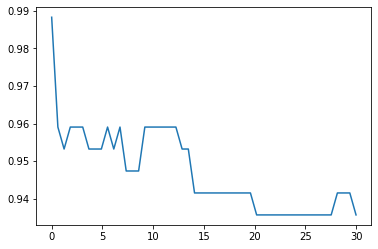

In [60]:
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="linear", C=i , cache_size=5000).fit(Xtrains, Ytrains)
    score.append(clf.score(Xtests, Ytests))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9883040935672515 3.6822448979591833


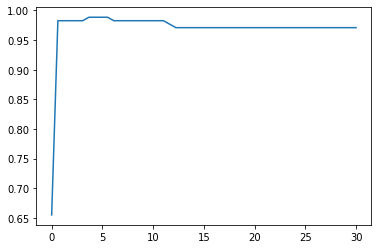

In [59]:
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="rbf", C=i , cache_size=5000).fit(Xtrains, Ytrains)
    score.append(clf.score(Xtests, Ytests))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9883040935672515 3.4759183673469387


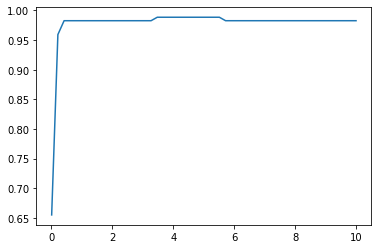

In [61]:
score = []
C_range = np.linspace(0.01, 10, 50)
for i in C_range:
    clf = SVC(kernel="rbf", C=i , cache_size=5000).fit(Xtrains, Ytrains)
    score.append(clf.score(Xtests, Ytests))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()